<h2>Hyperparameter Tuning</h2>

In [1]:
from sklearn import svm , datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np


In [2]:
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df["flower"] = iris.target
df["flower"] = df["flower"].apply(lambda x: iris.target_names[x])
df[47: 52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [4]:
#using the train and test split method

X_train , X_test , y_train , y_test = train_test_split(iris.data , iris.target , test_size = 0.25)


In [5]:
sv = svm.SVC(kernel = 'rbf' , C=30 , gamma = "auto")
sv.fit(X_train  , y_train)
sv.score(X_test , y_test)

1.0

In [6]:
#using for loop
kernels = ['rbf','linear']
C = [10 , 20 , 30]
k_avg = {}

for k_val in kernels:
    for c_val in C :
        cross_score = cross_val_score(svm.SVC(kernel = k_val , C = c_val , gamma = "auto") , iris.data , iris.target , cv = 5)
        k_avg[k_val + '_' + str(c_val)] = np.average(cross_score)
        
k_avg
        


{'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'rbf_30': 0.96,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'linear_30': 0.96}

In [7]:
#using the Gridsearch Cv

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV( svm.SVC(gamma = "auto") , {
    'C' : [1,10,20],
    'kernel' : ['rbf' , 'linear']
} ,cv = 5 , return_train_score = False)

clf.fit(X_train , y_train)
clf.cv_results_



{'mean_fit_time': array([0.00130186, 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'std_fit_time': array([0.00260372, 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'mean_score_time': array([0.00312443, 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00624886, 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [8]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001302,0.002604,0.003124,0.006249,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.956522,0.956522,0.909091,1.0,1.0,0.964427,0.033817,2
1,0.000000,0.000000,0.000000,0.000000,1,linear,"{'C': 1, 'kernel': 'linear'}",0.956522,0.956522,0.954545,1.0,1.0,0.973518,0.021635,1
2,0.000000,0.000000,0.000000,0.000000,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.956522,0.956522,0.909091,1.0,1.0,0.964427,0.033817,2
3,0.000000,0.000000,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",0.956522,0.956522,0.909091,1.0,1.0,0.964427,0.033817,2
4,0.000000,0.000000,0.000000,0.000000,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.956522,0.956522,0.909091,1.0,1.0,0.964427,0.033817,2
5,0.000000,0.000000,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",0.913043,0.956522,0.909091,1.0,1.0,0.955731,0.039794,6


In [9]:
df[["param_C", "param_kernel" , "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.964427
1,1,linear,0.973518
2,10,rbf,0.964427
3,10,linear,0.964427
4,20,rbf,0.964427
5,20,linear,0.955731


In [10]:
#using the best score parameters
clf.best_score_

0.9735177865612649

In [11]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [12]:
#using randomized Search Cv

from sklearn.model_selection import RandomizedSearchCV

In [13]:
rs = RandomizedSearchCV(svm.SVC(gamma = "auto"), {
    'C' : [1, 10 ,20],
    'kernel' : ['rbf' , 'linear']
} , cv = 5 , return_train_score =False , n_iter = 2)

rs.fit(X_train , y_train)
rs.cv_results_

{'mean_fit_time': array([0.00312371, 0.        ]),
 'std_fit_time': array([0.00624743, 0.        ]),
 'mean_score_time': array([0., 0.]),
 'std_score_time': array([0., 0.]),
 'param_kernel': masked_array(data=['rbf', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[10, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 10}, {'kernel': 'linear', 'C': 10}],
 'split0_test_score': array([0.95652174, 0.95652174]),
 'split1_test_score': array([0.95652174, 0.95652174]),
 'split2_test_score': array([0.90909091, 0.90909091]),
 'split3_test_score': array([1., 1.]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.96442688, 0.96442688]),
 'std_test_score': array([0.033817, 0.033817]),
 'rank_test_score': array([1, 1])}

In [14]:
df_rs = pd.DataFrame(rs.cv_results_)

In [15]:
df_rs[["param_kernel" , "param_C","mean_test_score"]]

,param_kernel,param_C,mean_test_score
0,rbf,10,0.964427
1,linear,10,0.964427


In [16]:
#choosing the best model to use
model_params = {
    'Svm' : {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf' , 'linear']
        }
    },
    
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression':{
        'model' : LogisticRegression(solver = 'liblinear' , multi_class = 'auto'),
        'params' : {
            'C' : [1,5,10]
        }
    }
}

In [17]:
scores = []


for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'] ,mp['params'] , cv = 5, return_train_score = False)
    clf.fit(iris.data , iris.target)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [18]:
df = pd.DataFrame(scores , columns = ["model" , "best_score" , "best_params"])
df

,model,best_score,best_params
0,Svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


<h2>Exercise</h2>

In [59]:
from sklearn.datasets import load_digits
import  matplotlib.pyplot as plt

In [60]:
ld = load_digits()

In [61]:
dir(ld)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [62]:
ld.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [63]:
ld.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

%matplotlib inline
plt.matshow(ld.data[0])

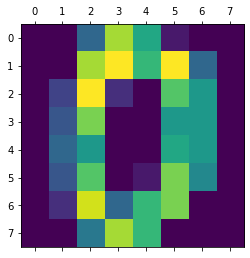

In [64]:
%matplotlib inline 
plt.matshow(ld.images[0])

In [81]:
#import the libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression

In [83]:
model_search = {
    "SVM" : {
    "models" : SVC(),
    "params" : {
        "C" : [1,5,10],
        "kernel" : ["rbf" , "linear"]
     }
    },
    "DecisionTree" : {
    "models" : DecisionTreeClassifier(),
    "params" : {
        "criterion" : ["gini"]
        } 
    }, 
    "RandomForestClassfier" : {
    "models" : RandomForestClassifier(),
    "params" : {
        "n_estimators" : [1,5,20]
       }
    }
}

In [85]:
scores = []


for model_name , mp in model_search.items():
    clf = GridSearchCV(mp['models'] ,mp['params'] , cv = 5, return_train_score = False)
    clf.fit(ld.data , ld.target)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [86]:
model_lt = pd.DataFrame(scores , columns = ["model" , "best_score" , "best_params"])
model_lt

,model,best_score,best_params
0,SVM,0.973850,"{'C': 5, 'kernel': 'rbf'}"
1,DecisionTree,0.789124,{'criterion': 'gini'}
2,RandomForestClassfier,0.927679,{'n_estimators': 20}
